## 2.6 Exercises

## 2.6.1 Algorithm Summaries

The following four problems are meant to have you re-build each of the algorithms that we developed in this chapter. Write all of the mathematical details completely and clearly. Don't just write "how" the method works, but give all of the mathematical details for "why" it works.




---

### Exercise 2.51. 

Let $f(x)$ be a continuous function on the interval $[a, b]$ where $f(a) \cdot f(b)<0$. Clearly give all of the mathematical details for how the Bisection Method approximates the root of the function $f(x)$ in the interval $[a, b]$.

**Solution:**

1. Choose the initial interval $[a, b]$ such that $f(a) \cdot f(b) < 0$.
2. Compute the midpoint $c = \frac{a + b}{2}$.
3. Evaluate $f(c)$.
4. If $f(c) = 0$ or $\frac{b - a}{2}$ is less than the desired tolerance, then $c$ is the root.
5. If $f(a) \cdot f(c) < 0$, then set $b = c$.
6. If $f(b) \cdot f(c) < 0$, then set $a = c$.
7. Repeat steps 2-6 until the desired tolerance is achieved.



---

### Exercise 2.52. 

Let $f(x)$ be a continuous function on the interval $[a, b]$ where $f(a) \cdot f(b)<0$. Clearly give all of the mathematical details for how the Regula Falsi Method approximates the root of the function $f(x)$ in the interval $[a, b]$.

**Solution:**

1. Choose the initial interval $[a, b]$ such that $f(a) \cdot f(b) < 0$.
2. Choose $\text{tol}_f$ and $\text{tol}_x$ for the desired tolerance levels.
3. Compute the point $c$ using the formula $c = \frac{a f(b) - b f(a)}{f(b) - f(a)}$.
4. Evaluate $f(c)$.
5. If $|f(c)| < \text{tol}_f$ or $|c - c_{\text{prev}}| < \text{tol}_x$, then $c$ is the root.
6. If $f(a) \cdot f(c) < 0$, then set $b = c$.
7. If $f(b) \cdot f(c) < 0$, then set $a = c$.
8. Repeat steps 3-7 until the desired tolerance is achieved.


---

### Exercise 2.53. 

Let $f(x)$ be a differentiable function with a root near $x=$ $x_{0}$. Clearly give all of the mathematical details for how Newton's Method approximates the root of the function $f(x)$.

**Solution:**

1. Choose an initial guess $x_0$ close to the root.
2. Choose tolerance levels $\text{tol}_f$ and $\text{tol}_x$ for the desired accuracy.
3. Compute the next approximation using the formula $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$.
4. Evaluate $f(x_{n+1})$.
5. If $|f(x_{n+1})| < \text{tol}_f$ or $|x_{n+1} - x_n| < \text{tol}_x$, then $x_{n+1}$ is the root.
6. Set $x_n = x_{n+1}$.
7. Repeat steps 3-6 until the desired tolerance is achieved.


---

### Exercise 2.54. 

Let $f(x)$ be a continuous function with a root near $x=$ $x_{0}$. Clearly give all of the mathematical details for how the Secant Method approximates the root of the function $f(x)$.

**Solution:**




---

## 2.6.2 Applying What You've Learned




---

### Exercise 2.55. 

How many iterations of the bisection method are necessary to approximate $\sqrt{3}$ to within $10^{-3}, 10^{-4}, \ldots, 10^{-15}$ using the initial interval $[a, b]=[0,2]$ ? See Theorem 2.2.

In [1]:
import numpy as np

a = 0
b = 2
for n in range(3,16):
    epsilon = 10**(-n)
    n = np.ceil(np.log2((b-a)/epsilon)-1)
    print(f'To get epsilon = {epsilon:.0e}, we need n = {n:.0f}') 

To get epsilon = 1e-03, we need n = 10
To get epsilon = 1e-04, we need n = 14
To get epsilon = 1e-05, we need n = 17
To get epsilon = 1e-06, we need n = 20
To get epsilon = 1e-07, we need n = 24
To get epsilon = 1e-08, we need n = 27
To get epsilon = 1e-09, we need n = 30
To get epsilon = 1e-10, we need n = 34
To get epsilon = 1e-11, we need n = 37
To get epsilon = 1e-12, we need n = 40
To get epsilon = 1e-13, we need n = 44
To get epsilon = 1e-14, we need n = 47
To get epsilon = 1e-15, we need n = 50



---

### Exercise 2.56. 

Refer back to Example 2.1 and demonstrate that you get the same results by solving the problem $x^{3}-3=0$. Generate versions of all of the plots from the Example and give thorough descriptions of what you learn from each plot.

In [3]:
def Bisection_Method(f, a, b, xtol=1.e-6, ftol=1.e-10, solution=None, verbosity=0):
    """
    Implements the Bisection method for finding a root of the function f in the interval [a, b]. 
    Optionally, it tracks the error relative to a known solution.

    Parameters:
    f (function): The function for which the root is sought.
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    xtol (float, optional): The stopping criterion based on the interval width. Default is 1.e-6.
    ftol (float, optional): The stopping criterion based on the function value. Default is 1.e-10.
    solution (float, optional): The known root of f, used to compute error tracking. Default is None.
    verbosity (int, optional): The level of verbosity for printing intermediate results. Default is 0.

    Returns:
    float: The estimated root of f if solution is None.
    tuple: (root, errors) if solution is provided, where errors is a list of absolute errors.

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs (i.e., no guarantee of a root in [a, b]).

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root, errors = Bisection_Method(f, 1, 3, solution=2)
    >>> print(root, errors)
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    iterations = 0

    while abs(b - a) > xtol:
        iterations += 1
        # Compute the midpoint of the interval
        c = (a + b) / 2.0

        # Store the error if a known solution is provided
        if solution is not None:
            errors.append(abs(c - solution))

        # Check if the function value at c is sufficiently close to zero
        if abs((b - a)/2) < xtol or abs(f(c)) < ftol:
            if verbosity > 0:
                print(f"Iterations: {iterations}")
                print(f"Approximated Root: {c}")
                print(f"Interval Width: {abs(b - a)/2}, tolerance {xtol}")
                print(f"Abs Function Value: {abs(f(c))}, tolerance {ftol}\n")
            if solution is None:
                return c  # Return the estimated root
            else:
                return c, errors  # Return the root along with error tracking

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b


In [10]:
f = lambda x: x**3 - 3
a = 1
b = 2
solution = 3**(1/3)
root, errors = Bisection_Method(f, a, b, solution=solution, xtol = 1e-12, ftol = 1e-14)

print(f"Approximate Root: {root}")
print(f"Exact Root: {solution}")
print(f"Absolute Error: {abs(root - solution)}")
print(f"f(approximate root): {f(root)}")

Approximate Root: 1.4422495703065579
Exact Root: 1.4422495703074083
Absolute Error: 8.504308368628699e-13
f(approximate root): -5.307310146918098e-12


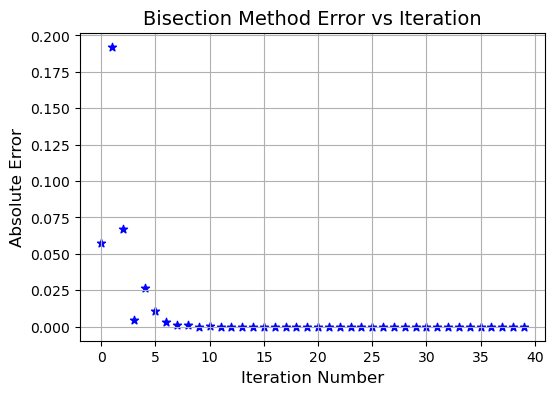

In [15]:
import matplotlib.pyplot as plt

iterations = len(errors)

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(range(iterations), errors, color="blue", marker="*", label="Absolute Error")

# Labels and title
ax.set_xlabel("Iteration Number", fontsize=12)
ax.set_ylabel("Absolute Error", fontsize=12)
ax.set_title("Bisection Method Error vs Iteration", fontsize=14)
ax.grid(True)

The plot of absolute error versus the iteration suggests that the absolute error decreases exponentially with the number of iterations of the bisection method.

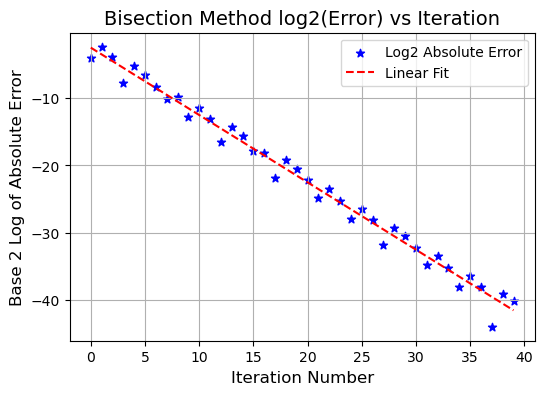

In [16]:
# Convert absolute error to log base 2 scale
log_errors = np.log2(errors)

# Fit a linear regression line for visualization
coeffs = np.polyfit(range(iterations), log_errors, 1)  # Linear fit
trendline = np.polyval(coeffs, range(iterations))

# Plot log2(error) vs iteration
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(range(iterations), log_errors, color="blue", marker="*", label="Log2 Absolute Error")
ax.plot(range(iterations), trendline, "r--", label="Linear Fit")

# Labels and title
ax.set_xlabel("Iteration Number", fontsize=12)
ax.set_ylabel("Base 2 Log of Absolute Error", fontsize=12)
ax.set_title("Bisection Method log2(Error) vs Iteration", fontsize=14)
ax.legend()
ax.grid(True)

This figure shows that the $\log_2(\epsilon) \approx -n - 2$.  If we solve for $\epsilon$ we get $\epsilon \approx 2^{-n-2}$ or $$\epsilon \approx \frac{0.5}{2^{n+1}}$$  

Which suggest that the initial error of about 0.5 is reduced by half every iteration.

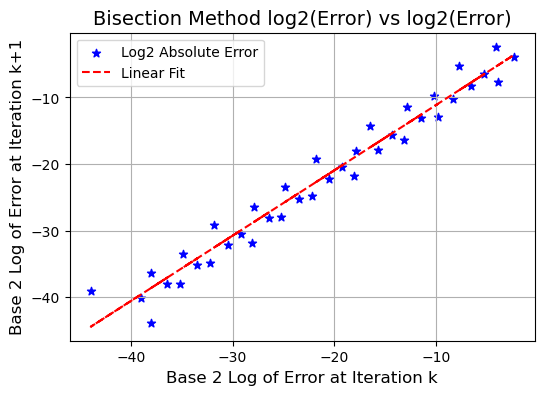

In [17]:
# Shifted data for iteration k vs k+1
log_errors_k = log_errors[:-1]  # log2(error) at iteration k
log_errors_k1 = log_errors[1:]  # log2(error) at iteration k+1

# Fit a linear regression line for visualization
coeffs = np.polyfit(log_errors_k, log_errors_k1, 1)  # Linear fit
trendline = np.polyval(coeffs, log_errors_k)

# Plot log2(error) at k+1 vs log2(error) at k
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(log_errors_k, log_errors_k1, color="blue", marker="*", label="Log2 Absolute Error")
ax.plot(log_errors_k, trendline, "r--", label="Linear Fit")

# Labels and title
ax.set_xlabel("Base 2 Log of Error at Iteration k", fontsize=12)
ax.set_ylabel("Base 2 Log of Error at Iteration k+1", fontsize=12)
ax.set_title("Bisection Method log2(Error) vs log2(Error)", fontsize=14)
ax.legend()
ax.grid(True)

Just like in the example, this shows empirically that

$$
\log _{2}(\text { absolute error at step } k+1) \approx 1 \cdot \log _{2}(\text { absolute error at step } k)-1
$$

Rearranging the algebra a bit we see that this linear relationship turns into

$$
\frac{\text { absolute error at step } k+1}{\text { absolute error at step } k} \approx \frac{1}{2}
$$

(You should stop now and do this algebra.) Rearranging a bit more we get

$$
(\text { absolute error at step } k+1)=\frac{1}{2}(\text { absolute error at step } k)


---

### Exercise 2.57. 

In this problem you will demonstrate that all of your root finding codes work. At the beginning of this chapter we proposed the equation solving problem

$$
3 \sin (x)+9=x^{2}-\cos (x)
$$

Write a script that calls upon your Bisection, Regula Falsi, Newton, and Secant methods one at a time to find the positive solution to this equation. Your script needs to output the solutions in a clear and readable way so you can tell which answer can from which root finding algorithm.



In [4]:

def Bisection_Method(f, a, b, xtol=1.e-6, ftol=1.e-10, solution=None, verbosity=0):
    """
    Implements the Bisection method for finding a root of the function f in the interval [a, b]. 
    Optionally, it tracks the error relative to a known solution.

    Parameters:
    f (function): The function for which the root is sought.
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    xtol (float, optional): The stopping criterion based on the interval width. Default is 1.e-6.
    ftol (float, optional): The stopping criterion based on the function value. Default is 1.e-10.
    solution (float, optional): The known root of f, used to compute error tracking. Default is None.
    verbosity (int, optional): The level of verbosity for printing intermediate results. Default is 0.

    Returns:
    float: The estimated root of f if solution is None.
    tuple: (root, errors) if solution is provided, where errors is a list of absolute errors.

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs (i.e., no guarantee of a root in [a, b]).

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root, errors = Bisection_Method(f, 1, 3, solution=2)
    >>> print(root, errors)
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    iterations = 0

    while abs(b - a) > xtol:
        iterations += 1
        # Compute the midpoint of the interval
        c = (a + b) / 2.0

        # Store the error if a known solution is provided
        if solution is not None:
            errors.append(abs(c - solution))

        # Check if the function value at c is sufficiently close to zero
        if abs((b - a)/2) < xtol or abs(f(c)) < ftol:
            if verbosity > 0:
                print(f"Iterations: {iterations}")
                print(f"Approximated Root: {c}")
                print(f"Interval Width: {abs(b - a)/2}, tolerance {xtol}")
                print(f"Abs Function Value: {abs(f(c))}, tolerance {ftol}\n")
            if solution is None:
                return c  # Return the estimated root
            else:
                return c, errors  # Return the root along with error tracking

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b


In [5]:
def Regula_Falsi_Method(f, a, b, xtol=1.e-6, ftol=1.e-10, solution=None, verbosity=0):
    """
    Implements the Regula Falsi method for finding a root of the function f in the interval [a, b]. 
    Optionally, it tracks the error relative to a known solution.

    Parameters:
    f (function): The function for which the root is sought.
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    xtol (float, optional): The stopping criterion based on the change in root approximation. Default is 1.e-6.
    ftol (float, optional): The stopping criterion based on the function value. Default is 1.e-10.
    solution (float, optional): The known root of f, used to compute error tracking. Default is None.
    verbosity (int, optional): The level of verbosity for printing intermediate results. Default is 0.

    Returns:
    float: The estimated root of f if solution is None.
    tuple: (root, errors) if solution is provided, where errors is a list of absolute errors.

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs (i.e., no guarantee of a root in the interval).

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root, errors = Regula_Falsi_Method(f, 1, 3, solution=2)
    >>> print(root, errors)
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    # Initial approximation
    c = a
    prev_c = c
    iterations = 0

    while True:
        iterations += 1
        # Compute the point using the Regula Falsi formula
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Store the error if a known solution is provided
        if solution is not None:
            errors.append(abs(c - solution))

        # Check if the function value at c is sufficiently close to zero or the change in root approximation is small
        if abs(c - prev_c) < xtol or abs(f(c)) < ftol:
            if verbosity > 0:
                print(f"Iterations: {iterations}")
                print(f"Approximated Root: {c}")
                print(f"Delta x: {abs(c - prev_c)}, tolerance {xtol}")
                print(f"Abs Function Value: {abs(f(c))}, tolerance {ftol}\n")
            if solution is None:
                return c  # Return the estimated root
            else:
                return c, errors  # Return the root along with error tracking

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b

        # Update the previous approximation
        prev_c = c


In [6]:
def Newton_Method(f, fprime, x0, xtol=1.e-6, ftol=1.e-10, solution=None, verbosity=0):
    """
    Implements Newton's method for finding a root of the function f starting from the initial guess x0.
    Optionally, it tracks the error relative to a known solution.

    Parameters:
    f (function): The function for which the root is sought.
    fprime (function): The derivative of the function f.
    x0 (float): The initial guess for the root.
    xtol (float, optional): The stopping criterion based on the change in root approximation. Default is 1.e-6.
    ftol (float, optional): The stopping criterion based on the function value. Default is 1.e-10.
    solution (float, optional): The known root of f, used to compute error tracking. Default is None.
    verbosity (int, optional): The level of verbosity for printing intermediate results. Default is 0.

    Returns:
    float: The estimated root of f if solution is None.
    tuple: (root, errors) if solution is provided, where errors is a list of absolute errors.

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> def fprime(x):
    >>>     return 2*x
    >>> root, errors = Newton_Method(f, fprime, 1, solution=2)
    >>> print(root, errors)
    """

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    iterations = 0
    while True:
        iterations += 1

        # Compute the next approximation using Newton's method formula
        x1 = x0 - f(x0) / fprime(x0)

        # Store the error if a known solution is provided
        if solution is not None:
            errors.append(abs(x1 - solution))

        # Check if the function value at x1 is sufficiently close to zero or the change in root approximation is small
        if abs(x1 - x0) < xtol or abs(f(x1)) < ftol:
            if verbosity > 0:
                print(f"Iterations: {iterations}")
                print(f"Approximated Root: {x1}")
                print(f"Delta x: {abs(x1 - x0)}, tolerance {xtol}")
                print(f"Abs Function Value: {abs(f(x1))}, tolerance {ftol}\n")
            if solution is None:
                return x1  # Return the estimated root
            else:
                return x1, errors  # Return the root along with error tracking

        # Update the previous approximation
        x0 = x1   


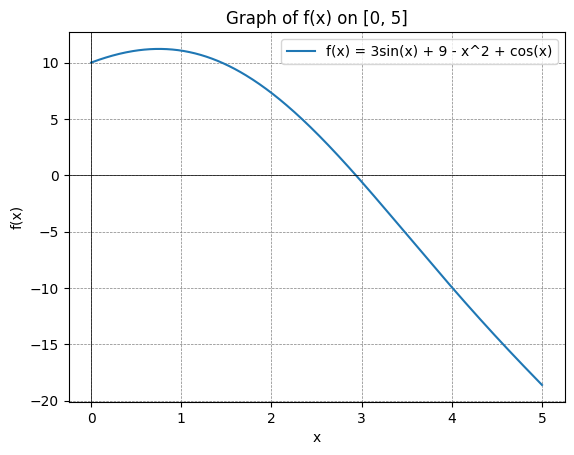

In [7]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 3*np.sin(x) + 9 - x**2 + np.cos(x)

# Define the range for x
x = np.linspace(0, 5, 400)

# Compute the values of f(x)
y = f(x)

# Plot the graph
plt.plot(x, y, label='f(x) = 3sin(x) + 9 - x^2 + cos(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) on [0, 5]')
plt.legend()
plt.show()


In [8]:
# Define the function and its derivative
f = lambda x: 3*np.sin(x) + 9 - x**2 + np.cos(x)
fprime = lambda x: 3*np.cos(x) - 2*x - np.sin(x)

# Bisection Method
print("Bisection Method")
root_bisection = Bisection_Method(f, 0, 5, verbosity = 1)

# Regula Falsi Method
print("Regula Falsi Method")
root_regula_falsi = Regula_Falsi_Method(f, 0, 5, verbosity = 1)

# Newton's Method
print("Newton's Method")
root_newton = Newton_Method(f, fprime, 2, verbosity = 1)

Bisection Method
Iterations: 23
Approximated Root: 2.93748676776886
Interval Width: 5.960464477539062e-07, tolerance 1e-06
Abs Function Value: 3.942783177612874e-06, tolerance 1e-10

Regula Falsi Method
Iterations: 5
Approximated Root: 2.937487205125155
Delta x: 2.5639280920586316e-07, tolerance 1e-06
Abs Function Value: 1.5587808821493354e-10, tolerance 1e-10

Newton's Method
Iterations: 4
Approximated Root: 2.9374872051080065
Delta x: 1.2517349872176453e-06, tolerance 1e-06
Abs Function Value: 1.276978522923855e-12, tolerance 1e-10




---

### Exercise 2.58. 

A root-finding method has a convergence rate of order $M$ if there is a constant $C$ such that

$$
\left|x_{k+1}-x_{*}\right| \leq C\left|x_{k}-x_{*}\right|^{M}
$$

Here, $x_{*}$ is the exact root, $x_{k}$ is the $k^{t h}$ iteration of the root finding technique, and $x_{k+1}$ is the $(k+1)^{s t}$ iteration of the root finding technique.

1. If we consider the equation

$$
\left|x_{k+1}-x_{*}\right| \leq C\left|x_{k}-x_{*}\right|^{M}
$$

and take the logarithm (base 10) of both sides then we get

$$
\log \left(\left|x_{k+1}-x_{*}\right|\right) \leq \underline{\hspace{1in}} + \leq \underline{\hspace{1in}}
$$

2. In part 1. you should have found that the $\log$ of new error is a linear function of the log of the old error. What is the slope of this linear function on a log-log plot?

3. In the plots below you will see six different log-log plots of the new error to the old error for different root finding techniques. What is the order of the approximate convergence rate for each of these methods?

4. In your own words, what does it mean for a root finding method to have a "first order 
convergence rate?" "Second order convergence rate?" etc.

<img src="https://datascienceuwl.github.io/MTH371/figures/Chapter2/Figure_2_12.png?timestamp=1700000000" width = 600 alt="Figure 2.12: Six Error Plots">

We approximate the slope of the log base 10 of the absolute errors for each method to get the approximate convergence rate:

* Methods 1 and 2:  the slope is about 1 suggesting first order convergence
* Method 3: slope is about $13/8 \approx 1.63$ so somewhere between first and second order convergence
* Methods 4 and 5:  the slope is about 2 suggesting second order (quadratic) converence
* Method 6: the slope is about 3 suggesting third order convergence - that means the number of accurate digits would approximately triple after each iteration


---

### Exercise 2.59. 

Shelby started using Newton's method to solve a root-finding problem. To test her code she was using an equation for which she knew the solution. Given the starting point the absolute error after one step of Newton's method was $\left|x_{1}-x_{*}\right|=0.2$. What is the approximate expected error at step 2 ? What about at step 3? Step 4? Defend your answers by fully describing your thought process.

**Solution:**  The absolute error at the next step of Newton's method is approximately
$$e_{k+1} = C e_{k}^2$$  

If we assume $C = 1$ then the error the next few steps is:


In [3]:
C = 1
err = 0.2
for i in range(2,6):
  err = err**2
  print(f'The error after {i} iterations is about {err:.2e}')

The error after 2 iterations is about 4.00e-02
The error after 3 iterations is about 1.60e-03
The error after 4 iterations is about 2.56e-06
The error after 5 iterations is about 6.55e-12



---

### Exercise 2.60. 

There are MANY other root finding techniques beyond the four that we have studied thus far. We can build these methods using Taylor Series as follows:

Near $x=x_{0}$ the function $f(x)$ is approximated by the Taylor Series

$$
f(x) \approx y=f\left(x_{0}\right)+\sum_{n=1}^{N} \frac{f^{(n)}\left(x_{0}\right)}{n!}\left(x-x_{0}\right)^{n}
$$

where $N$ is a positive integer. In a root-finding algorithm we set $y$ to zero to find the root of the approximation function. The root of this function should be close to the actual root that we're looking for. Therefore, to find the next iterate we solve the equation

$$
0=f\left(x_{0}\right)+\sum_{n=1}^{N} \frac{f^{(n)}\left(x_{0}\right)}{n!}\left(x-x_{0}\right)^{n}
$$

for $x$. For example, if $N=1$ then we need to solve $0=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)$ for $x$. In doing so we get $x=x_{0}-f\left(x_{0}\right) / f^{\prime}\left(x_{0}\right)$. This is exactly Newton's method. If $N=2$ then we need to solve

$$
0=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)+\frac{f^{\prime \prime}\left(x_{0}\right)}{2!}\left(x-x_{0}\right)^{2}
$$

for $x$.

1. Solve for $x$ in the case that $N=2$. Then write a Python function that implements this root-finding method.

2. Demonstrate that your code from part 1. is indeed working by solving several problems where you know the exact solution.

3. Show several plots that estimates the order of the method from part 1. That is, create a log-log plot of the successive errors for several different equation-solving problems.

4. What are the pro's and con's to using this new method?



---

### Exercise 2.61. 

An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is

$$
s(t)=s_{0}-\frac{m g}{k} t+\frac{m^{2} g}{k^{2}}\left(1-e^{-k t / m}\right)
$$

where $m$ is the mass measured in $\mathrm{kg}, g$ is gravity measured in meters per second per second, $s_{0}$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

1. What are the units of the parameter $k$ ? **Solution:** k must have units of kg/s to that $mgt/k$ has units of meters.

2. If $m=1 \mathrm{~kg}, g=9.8 \mathrm{~m} / \mathrm{s}^{2}, k=0.1$, and $s_{0}=100 \mathrm{~m}$ how long will it take for the object to hit the ground? Find your answer to within 0.01 seconds.

3. The value of $k$ depends on the aerodynamics of the object and might be challenging to measure. We want to perform a sensitivity analysis on your answer to part (b) subject to small measurement errors in $k$. If the value of $k$ is only known to within $10 \%$ then what are your estimates of when the object will hit the ground?


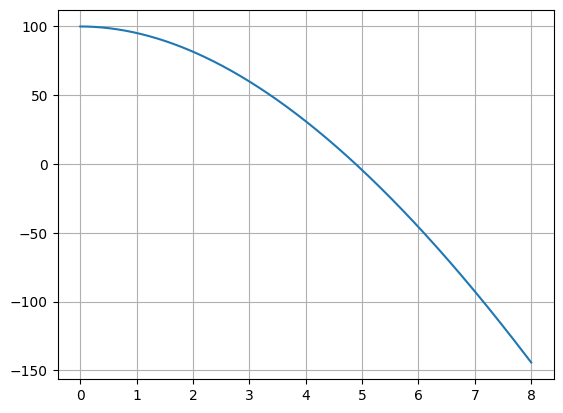

In [9]:
m = 1
g = 9.8
k = 0.1
s0 = 100
f = lambda t: s0 - m*g/k*t + (m**2*g/k**2)*(1 - np.exp(-k*t/m))
t = np.linspace(0, 8, 400)
plt.plot(t,f(t))
plt.grid(True)

Plotting the height as a function of $t$ as in the graph above shows the object strikes the ground after somewhere between 4 and 5 seconds, around 4.8 seconds perhaps.  Let's use the bisection method to get a good estimate.

In [10]:
t_strike = Bisection_Method(f, 4, 5, verbosity = 1)

Iterations: 20
Approximated Root: 4.884865760803223
Interval Width: 9.5367431640625e-07, tolerance 1e-06
Abs Function Value: 1.89401918078147e-05, tolerance 1e-10



If $k$ is only known to within 10% then its value is between 0.09 and 0.11.  Let's compute the time of ground strike with both estimates to see the uncertainty in the time estimate.


In [11]:

k = 0.09
f_low = lambda t: s0 - m*g/k*t + (m**2*g/k**2)*(1 - np.exp(-k*t/m))
t_strike_low = Bisection_Method(f_low, 4, 5, verbosity = 1)

k = 0.11
f_high = lambda t: s0 - m*g/k*t + (m**2*g/k**2)*(1 - np.exp(-k*t/m))
t_strike_high = Bisection_Method(f_high, 4, 5, verbosity = 1)

Iterations: 20
Approximated Root: 4.845555305480957
Interval Width: 9.5367431640625e-07, tolerance 1e-06
Abs Function Value: 2.1579256213044573e-06, tolerance 1e-10

Iterations: 20
Approximated Root: 4.9247846603393555
Interval Width: 9.5367431640625e-07, tolerance 1e-06
Abs Function Value: 3.193055022165936e-05, tolerance 1e-10



If $k$ is between $0.09$ and $0.11$ then we can say that the time to strike the ground is between $t = 4.85$ seconds and $t=4.92$ seconds.


---

### Exercise 2.62. 

Can the Bisection Method, Regula Falsi Method, or Newton's Method be used to find the roots of the function $f(x)=\cos (x)+1$ ? Explain why or why not for each technique?


Since $f(x) \geq 0$ we don't have the sign changes necessary to apply the Bisection and Regula Falsi methods.

Newton's method can still work, but we won't get quadratic convergence because $f'(x)$ approaches zero as we approach the root.  Let's illustrate Newton's method here.

Iterations: 14
Approximated Root: 3.141584030718072
Delta x: 8.622875641961514e-06, tolerance 1e-06
Abs Function Value: 3.717692820259799e-11, tolerance 1e-10



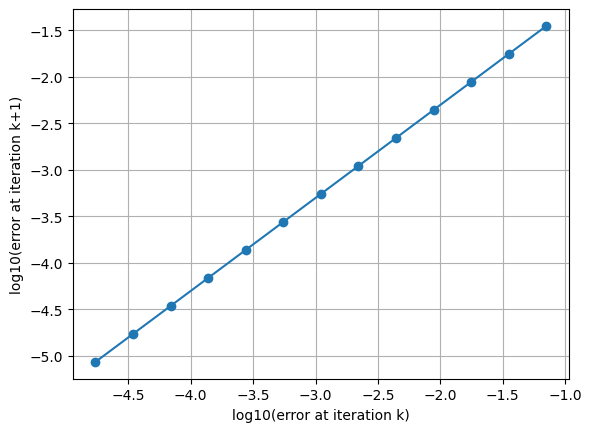

In [12]:
f = lambda x:np.cos(x)+1
fprime = lambda x:-np.sin(x)

root, errors = Newton_Method(f, fprime, 3, solution=np.pi, verbosity=1)

log10_errors = np.log10(errors)
plt.plot(log10_errors[:-1], log10_errors[1:], 'o-')
plt.xlabel('log10(error at iteration k)')
plt.ylabel('log10(error at iteration k+1)')
plt.grid()
plt.show()

Newton's method still converges, but it has first order convergence.


---

### Exercise 2.63. 

In Single Variable Calculus you studied methods for finding local and global extrema of functions. You likely recall that part of the process is to set the first derivative to zero and to solve for the independent variable (remind yourself why you're doing this). The trouble with this process is that it may be very very challenging to solve by hand. This is a perfect place for Newton's method or any other root finding techinque!
Find the local extrema for the function $f(x)=x^{3}(x-3)(x-6)^{4}$ using numerical techniques where appropriate.


**Solution**

We need to look for critical points of $f$ by finding places where $f'(x)$ DNE or $f'(x)=0$.  Since $f$ is a polynomial it is differentiable everywhere.  We'll use `sympy` to compute the derivatives (we'll need $f''$ later for Newton's method):


In [13]:
import sympy as sp

f = lambda x: x**3 * (x-3) * (x-6)**4
# Define the variable and function
x_sym = sp.symbols('x')
f_sym = x_sym**3 * (x_sym - 3) * (x_sym - 6)**4

# Compute the first and second derivatives
fprime_sym = sp.diff(f_sym, x_sym)
fprimeprime_sym = sp.diff(fprime_sym, x_sym)

# Factor the first and second derivatives
fprime_sym = sp.factor(fprime_sym)
fprimeprime_sym= sp.factor(fprimeprime_sym)

# Convert to evaluatable functions
fprime = sp.lambdify(x_sym, fprime_sym, 'numpy')
fprimeprime = sp.lambdify(x_sym, fprimeprime_sym, 'numpy')

print(fprime_sym)
print(fprimeprime_sym)

x**2*(x - 6)**3*(8*x**2 - 45*x + 54)
2*x*(x - 6)**2*(28*x**3 - 231*x**2 + 540*x - 324)


Clearly the derivative is zero at $x=0$ and $x=6$.  We could solve the $8x^2-39x+54 = 0$ using the quadratic formula but we'll use numerical root finding instead.  

Let's plot $f'(x)$ to get approximate locations for the other two roots:

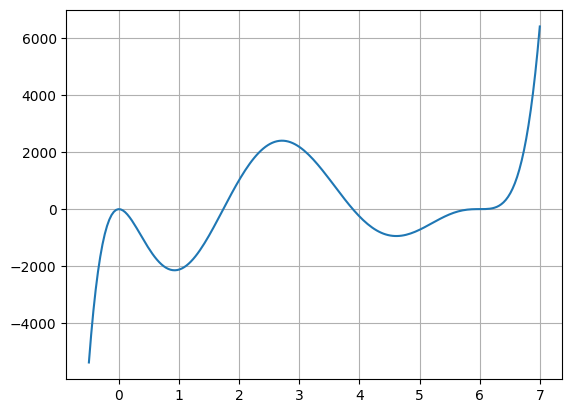

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-.5,7,200)
y = fprime(x)
plt.plot(x,y)
plt.grid(True)

Besides the roots at $x=0$ and $x=6$ there are roots near $x=1.7$ and $x=3.8$.  Furthermore, we can predict the nature of each of the critical points based on the sign of the derivative (First Derivative Test)
* $f$ does not have a local extreme at $x=0$ since the derivative does not change sign
* $f$ has a local minimum at $x \approx 1.7$ since the derivative changes from negative to positive there
* $f$ has a local max at $x \approx 3.8$ since the derivative changes from positive to negative there
* $f$ has a local min at $x=6$ since the derivative changes from negative to positive there

Now let's get better approximations to the two inexact roots of $f'$:

In [15]:
root1 = Newton_Method(fprime, fprimeprime, 1.7, verbosity=1)
root2 = Newton_Method(fprime, fprimeprime, 3.8, verbosity=1)

Iterations: 3
Approximated Root: 1.73539450377412
Delta x: 1.1681766665105897e-11, tolerance 1e-06
Abs Function Value: 3.319351328321415e-12, tolerance 1e-10

Iterations: 4
Approximated Root: 3.8896054962258813
Delta x: 4.882316773091588e-12, tolerance 1e-06
Abs Function Value: 0.0, tolerance 1e-10



In [16]:
print(f'At x={root1}, f has a minimum value of {f(root1):.2f}')
print(f'At x={root2}, f has a maximum value of {f(root2):.2f}')
print(f'At x=6, f has a minimum value of {f(6):.2f}')

At x=1.73539450377412, f has a minimum value of -2186.08
At x=3.8896054962258813, f has a maximum value of 1038.41
At x=6, f has a minimum value of 0.00


Let's graph f with the local extrema indicated so verify we've found everything.

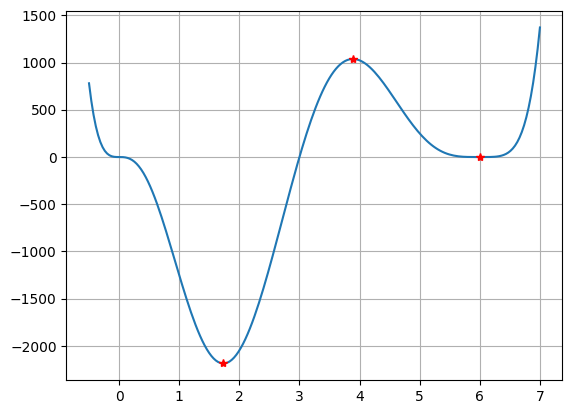

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-.5,7,200)
y = f(x)
plt.plot(x,y)
plt.plot(root1, f(root1), 'r*')
plt.plot(root2, f(root2), 'r*')
plt.plot(6, f(6), 'r*')
plt.grid(True)


---

### Exercise 2.64. 

A fixed point of a function $f(x)$ is a point that solves the equation $f(x)=x$. Fixed points are interesting in iterative processes since fixed points don't change under repeated application of the function $f$.

For example, consider the function $f(x)=x^{2}-6$. The fixed points of $f(x)$ can be found by solving the equation $x^{2}-6=x$ which, when simplified algebraically, is $x^{2}-x-6=0$. Factoring the left-hand side gives $(x-3)(x+2)=0$ which implies that $x=3$ and $x=-2$ are fixed points for this function. That is, $f(3)=3$ and $f(-2)=-2$. Notice, however, that finding fixed points is identical to a root finding problem.

1. Use a numerical root-finding algorithm to find the fixed points of the function $f(x)=x^{2}-6$ on the interval $[0, \infty)$.

2. Find the fixed points of the function $f(x)=\sqrt{\frac{8}{x+6}}$.


**Solution**

Finding a fixed point $f(x)=x$ is equivalent to find roots of $g(x) = f(x)-x$. In this case, for the first function we have

$$g(x) = x^2-6-x.$$  

Plotting that we get:

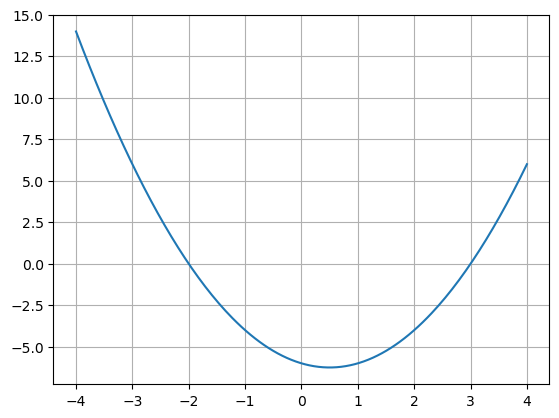

In [15]:
x = np.linspace(-4,4,200)
f = lambda x:x**2-6
g = lambda x:f(x)-x
y = g(x)
plt.plot(x,y)
plt.grid(True)

It appears that the roots of $g$ (the fixed points of $f$) are near $x=-2$ and $x=3$.  We can use the bisection method to approximate the roots (fixed points):

In [20]:
fp1 = Bisection_Method(g, -3, -1, verbosity=1)
fp2 = Bisection_Method(g, 2, 4, verbosity=1)

Iterations: 1
Approximated Root: -2.0
Interval Width: 1.0, tolerance 1e-06
Abs Function Value: 0.0, tolerance 1e-10

Iterations: 1
Approximated Root: 3.0
Interval Width: 1.0, tolerance 1e-06
Abs Function Value: 0.0, tolerance 1e-10



Now, we'll repeat the exercise for the second function:

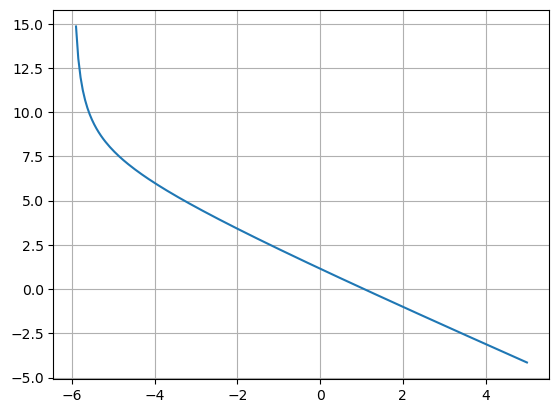

In [24]:
f = lambda x:np.sqrt(8/(x+6))
g = lambda x:f(x)-x
x = np.linspace(-5.9,5,200) # domain of f is x > -6
y = g(x)
plt.plot(x,y)
plt.grid(True)

In [28]:
fp = Bisection_Method(g, 0, 2, verbosity=1)
print(f'The fixed point is approximately {fp:.6f} and f({fp:.6f}) is approximately {f(fp):.6f}')

Iterations: 21
Approximated Root: 1.0641775131225586
Interval Width: 9.5367431640625e-07, tolerance 1e-06
Abs Function Value: 2.7888839992940007e-07, tolerance 1e-10

The fixed point is approximately 1.064178 and f(1.064178) is approximately 1.064178



---

### Exercise 2.65. (`scipy.optimize.fsolve()`) 

The scipy library in Python has many built-in numerical analysis routines much like the ones that we have built in this chapter. Of particular interest to the task of root finding is the fsolve command in the scipy.optimize library.

1. Go to the [help documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) for `scipy.optimize.fsolve` and make yourself familiar with how to use the tool.

2. First solve the equation $x \sin (x)-\ln (x)=0$ for $x$ starting at $x_{0}=3$.

    * Make a plot of the function on the domain $[0,5]$ so you can eyeball the root before using the tool.
    * Use the `scipy.optimize.fsolve()` command to approximate the root.
    * Fully explain each of the outputs from the `scipy.optimize.fsolve()` command. You should use the `fsolve()` command with `full_output=1` so you can see all of the solver diagnostics.

3. Demonstrate how to use `fsolve()` using any non-trivial nonlinear equation solving problem. Demonstrate what some of the options of `fsolve()` do.

4. The `scipy.optimize.fsolve()` command can also solve systems of equations (something we have not built algorithms for in this chapter). Consider the system of equations

$$
\begin{aligned}
& x_{0} \cos \left(x_{1}\right)=4 \\
& x_{0} x_{1}-x_{1}=5
\end{aligned}
$$

The following Python code allows you to use `scipy.optimize.fsolve()` so solve this system of nonlinear equations in much the same way as we did in part (b) of this problem. However, be aware that we need to think of x as a vector of $x$-values. Go through the code below and be sure that you understand every line of code.

```python
import numpy as np
from scipy.optimize import fsolve
def F(x):
    Output = [ x[0]*np.cos(x[1])-4 ]
    Output.append( x[0]*x[1] - x[1] - 5 )
    return Output
# Or alternately we could define the system as a lambda function
# with F = lambda x: [ x[0]*np.cos(x[1])-4 , x[0]*x[1]-x[1]-5 ]
fsolve(F,[6,1],full_output=1)
# Note: full_output gives the solver diagnostics
```

5. Solve the system of nonlinear equations below using `fsolve()`.

$$
\begin{array}{r}
x^{2}-x y^{2}=2 \\
x y=2
\end{array}
$$


